In [ ]:
import pandas as pd

# Read the Excel file into a DataFrame
df_production = pd.read_csv(r"C:\Users\zceylan\Desktop\360\production.csv")

# Split the data in the first column (index 0) based on commas and expand into separate columns
split_data = df_production.iloc[:, 0].str.split(',', expand=True)

# Concatenate the split data with the original DataFrame
df_production = pd.concat([df_production, split_data], axis=1)

# Optionally, you can drop the original column if you no longer need it
df_production = df_production.drop(columns=[0])

df_production

,date,hour,production
0,2022-01-01,0,0.0
1,2022-01-01,1,0.0
2,2022-01-01,2,0.0
3,2022-01-01,3,0.0
4,2022-01-01,4,0.0
...,...,...,...
20131,2024-04-16,19,0.0
20132,2024-04-16,20,0.0
20133,2024-04-16,21,0.0
20134,2024-04-16,22,0.0


In [ ]:
# Read the Excel file into a DataFrame
df_weather = pd.read_csv(r"C:\Users\zceylan\Desktop\360\weather_info.csv")

# Split the data in the first column (index 0) based on commas and expand into separate columns
split_data = df_weather.iloc[:, 0].str.split(',', expand=True)

# Concatenate the split data with the original DataFrame
df_weather = pd.concat([df_weather, split_data], axis=1)

# Optionally, you can drop the original column if you no longer need it
df_weather = df_weather.drop(columns=[0])

df_weather

,date,hour,lat,lon,DSWRF_surface,TCDC_low.cloud.layer,TCDC_middle.cloud.layer,TCDC_high.cloud.layer,TCDC_entire.atmosphere,USWRF_top_of_atmosphere,CSNOW_surface,DLWRF_surface,USWRF_surface,TMP_surface
0,2023-07-12,10,37.75,34.50,718.080,0.0,0.0,0.0,0.0,200.624,0.0,310.008,166.848,306.700
1,2022-10-25,14,37.75,34.75,608.080,0.0,0.0,0.0,0.0,156.656,0.0,253.651,113.008,297.891
2,2022-10-25,15,37.75,34.50,590.592,0.0,0.0,0.0,0.0,180.432,0.0,271.926,138.624,298.600
3,2022-06-23,2,37.75,34.75,0.000,9.7,13.9,0.0,17.9,0.000,0.0,313.849,0.000,285.300
4,2022-06-26,3,37.75,34.50,0.000,50.6,42.4,0.0,52.0,0.000,0.0,336.624,0.000,286.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505495,2024-04-22,8,38.00,34.50,54.032,0.0,1.0,63.6,65.3,38.400,0.0,265.446,12.512,287.548
505496,2024-04-21,22,38.00,35.50,0.000,1.7,0.0,0.3,2.0,0.000,0.0,265.439,0.000,281.277
505497,2024-04-21,23,38.00,35.00,0.000,0.0,0.0,10.9,12.1,0.000,0.0,251.400,0.000,280.388
505498,2024-04-22,3,38.75,35.00,0.000,1.9,0.5,54.2,56.8,0.000,0.0,280.721,0.000,282.896


In [ ]:
data = pd.merge(df_weather, df_production, on=['date', 'hour'])

# Sort data by date and hour in increasing order
data = data.sort_values(by=['date', 'hour'], ascending=[True, True])

# Reset index after sorting
data = data.reset_index(drop=True)

data

,date,hour,lat,lon,DSWRF_surface,TCDC_low.cloud.layer,TCDC_middle.cloud.layer,TCDC_high.cloud.layer,TCDC_entire.atmosphere,USWRF_top_of_atmosphere,CSNOW_surface,DLWRF_surface,USWRF_surface,TMP_surface,production
0,2022-01-01,4,38.00,35.25,0.0,0.0,5.1,4.1,10.6,0.0,0.0,209.479,0.0,265.004,0.0
1,2022-01-01,4,38.75,35.50,0.0,1.4,0.1,5.0,6.7,0.0,0.0,232.479,0.0,271.204,0.0
2,2022-01-01,4,37.75,35.00,0.0,1.7,25.1,5.0,32.3,0.0,0.0,217.179,0.0,265.604,0.0
3,2022-01-01,4,38.00,34.75,0.0,3.0,5.0,7.2,15.1,0.0,0.0,225.079,0.0,269.004,0.0
4,2022-01-01,4,38.25,35.00,0.0,0.0,0.0,1.7,1.7,0.0,0.0,230.679,0.0,271.204,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503295,2024-04-16,23,38.25,35.50,0.0,0.0,0.0,48.9,48.9,0.0,0.0,283.561,0.0,284.445,0.0
503296,2024-04-16,23,38.75,34.75,0.0,0.0,0.0,46.6,46.8,0.0,0.0,291.161,0.0,286.745,0.0
503297,2024-04-16,23,38.50,35.50,0.0,0.0,0.0,20.5,21.4,0.0,0.0,259.561,0.0,280.245,0.0
503298,2024-04-16,23,38.00,35.50,0.0,0.0,0.0,25.0,25.9,0.0,0.0,271.861,0.0,282.045,0.0


In [ ]:
# Group by 'date' and 'hour', calculate mean for each group
data_grouped = data.groupby(['date', 'hour']).mean()

# Optionally, you can drop the 'lat' and 'lon' columns
data_grouped = data_grouped.drop(columns=['lat', 'lon'])

# Reset index
data_grouped = data_grouped.reset_index()

data_grouped

,date,hour,DSWRF_surface,TCDC_low.cloud.layer,TCDC_middle.cloud.layer,TCDC_high.cloud.layer,TCDC_entire.atmosphere,USWRF_top_of_atmosphere,CSNOW_surface,DLWRF_surface,USWRF_surface,TMP_surface,production
0,2022-01-01,4,0.00000,2.384,5.944,4.604,14.296,0.00000,0.0,227.999,0.00000,269.2200,0.0
1,2022-01-01,5,0.00000,2.784,4.324,10.636,19.272,0.00000,0.0,227.774,0.00000,269.1040,0.0
2,2022-01-01,6,0.00000,2.964,5.372,11.688,21.772,0.00000,0.0,227.764,0.00000,269.0350,0.0
3,2022-01-01,7,0.00000,3.284,9.212,20.736,31.992,0.00000,0.0,228.196,0.00000,269.0010,0.0
4,2022-01-01,8,0.00000,3.672,11.252,26.432,38.376,0.00000,0.0,228.657,0.00000,269.0020,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20079,2024-04-16,19,413.35280,0.000,0.000,0.052,0.052,124.22592,0.0,288.574,82.45440,287.8624,0.0
20080,2024-04-16,20,331.04384,0.000,0.000,1.176,1.260,99.84448,0.0,286.926,66.04416,285.9490,0.0
20081,2024-04-16,21,275.86880,0.000,0.000,9.320,9.496,83.20320,0.0,285.890,55.03616,285.2360,0.0
20082,2024-04-16,22,0.00000,0.000,0.000,20.744,21.348,0.00000,0.0,277.458,0.00000,284.5690,0.0


<Figure size 1000x600 with 0 Axes>

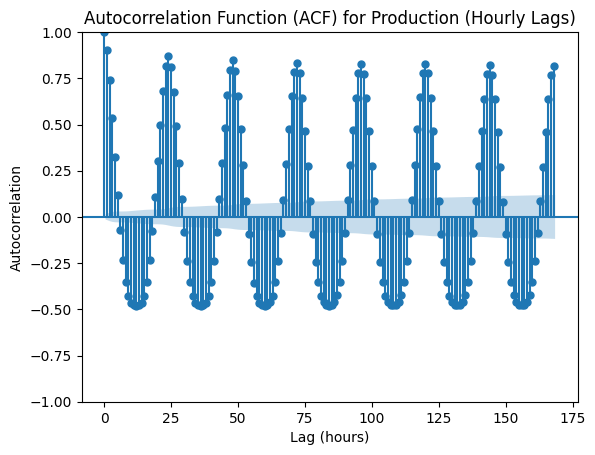

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF for 'production' column with hourly lags
plt.figure(figsize=(10, 6))
plot_acf(data_grouped['production'], lags=24*7)  # Plot for 7 days of hourly lags
plt.xlabel('Lag (hours)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Production (Hourly Lags)')
plt.show()

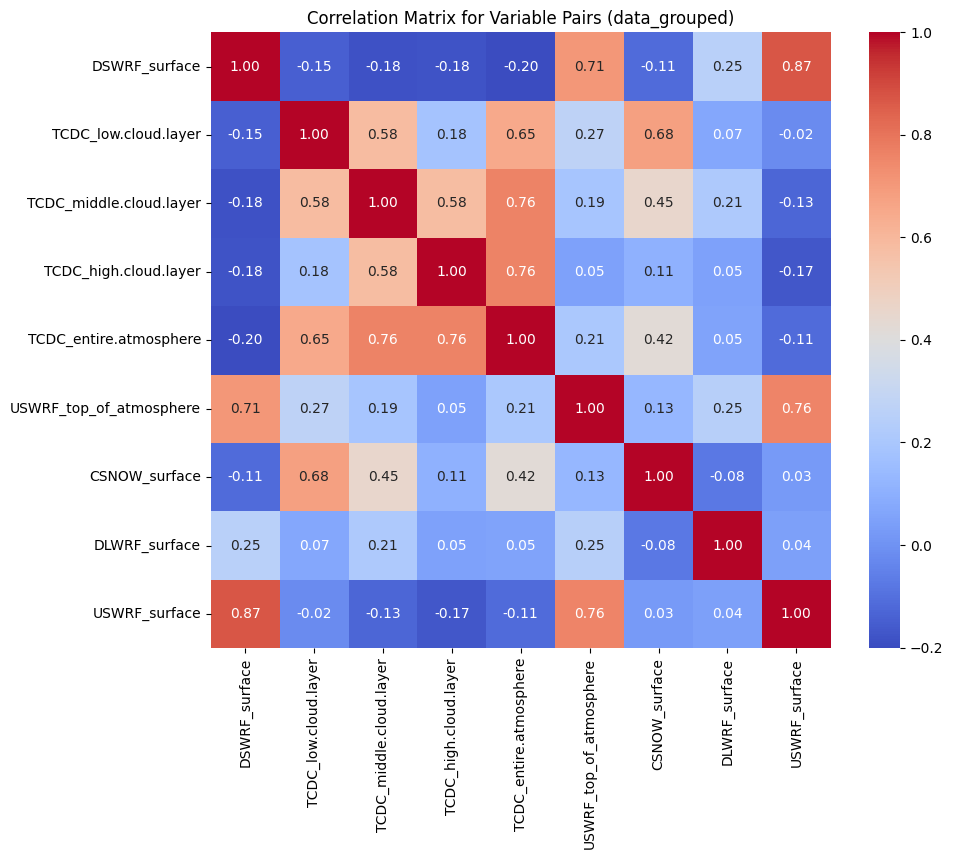

In [ ]:
import seaborn as sns

# Select the columns containing variables (columns 2-11)
variable_columns = data_grouped.iloc[:, 2:11]

# Calculate the correlation matrix
correlation_matrix = variable_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Variable Pairs (data_grouped)')
plt.show()

<Figure size 1000x600 with 0 Axes>

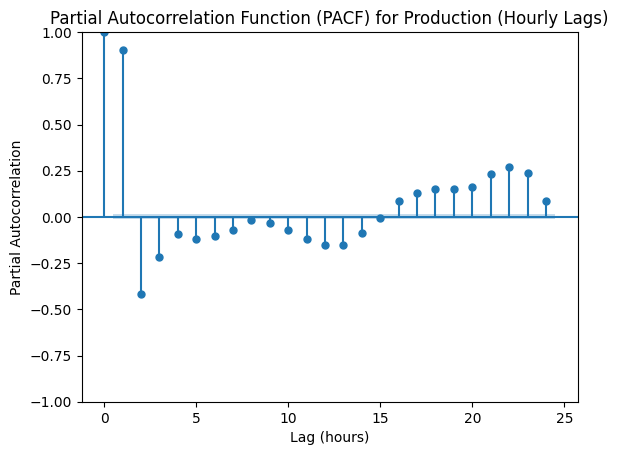

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF for 'production' column
plt.figure(figsize=(10, 6))
plot_pacf(data_grouped['production'], lags=24)  # Plot for 7 days of hourly lags
plt.xlabel('Lag (hours)')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) for Production (Hourly Lags)')
plt.show()

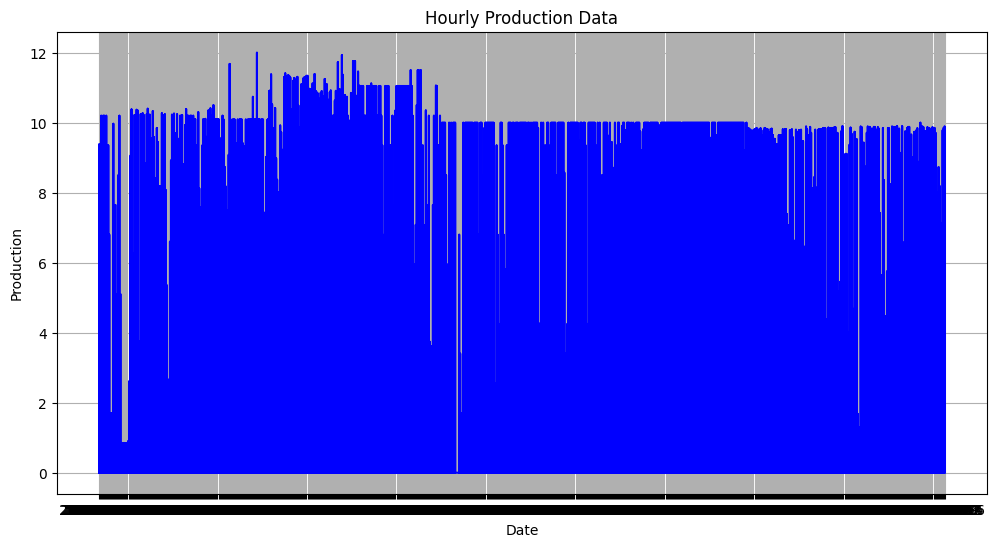

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_grouped['date'], data_grouped['production'], color='blue')
plt.title('Hourly Production Data')
plt.xlabel('Date')
plt.ylabel('Production')
plt.grid(True)
plt.show()

Create a time-series plot for the production data

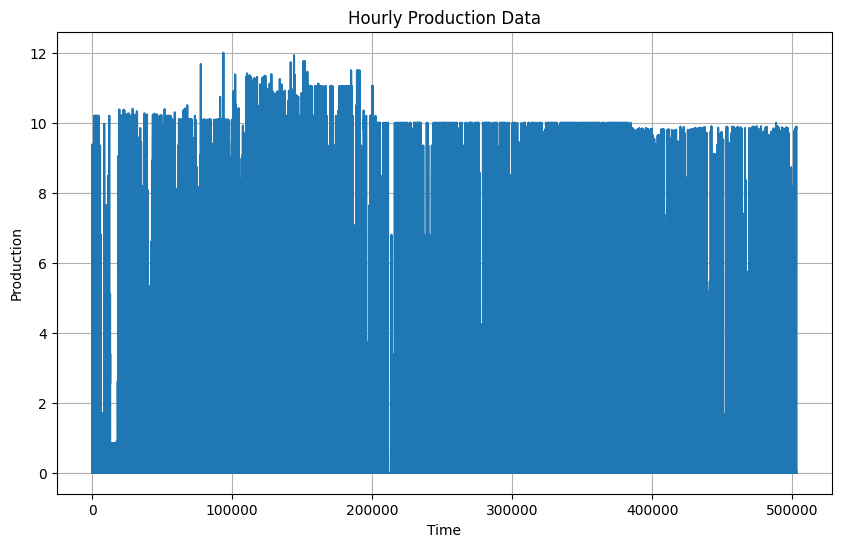

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame containing the production data
# Convert 'data' to a time series format
ts_production = pd.Series(data['production'])

# Plot the time series data
plt.figure(figsize=(10, 6))
ts_production.plot()
plt.title('Hourly Production Data')
plt.xlabel('Time')
plt.ylabel('Production')
plt.grid(True)
plt.show()

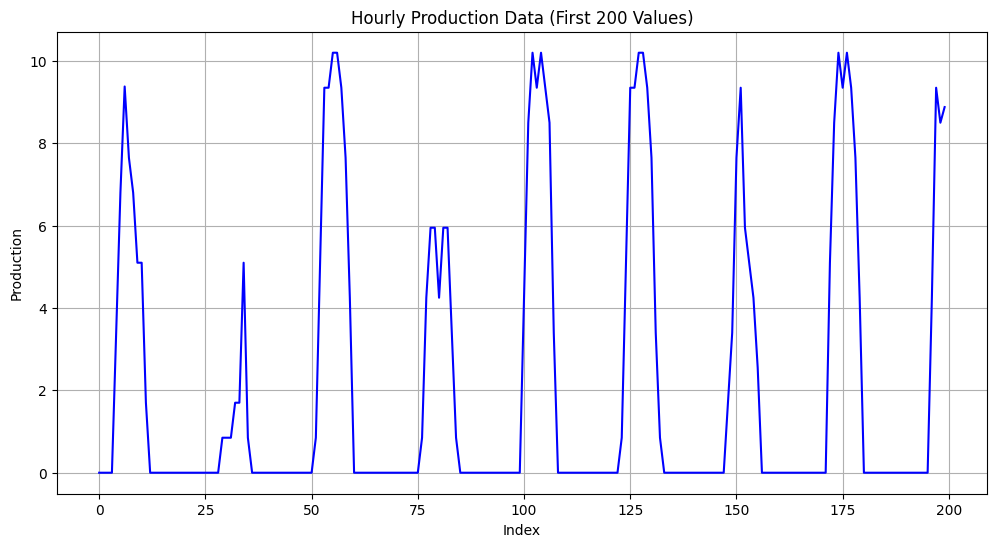

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data_grouped["production"][:200], color='blue')
plt.title('Hourly Production Data (First 200 Values)')
plt.xlabel('Index')
plt.ylabel('Production')
plt.grid(True)
plt.show()

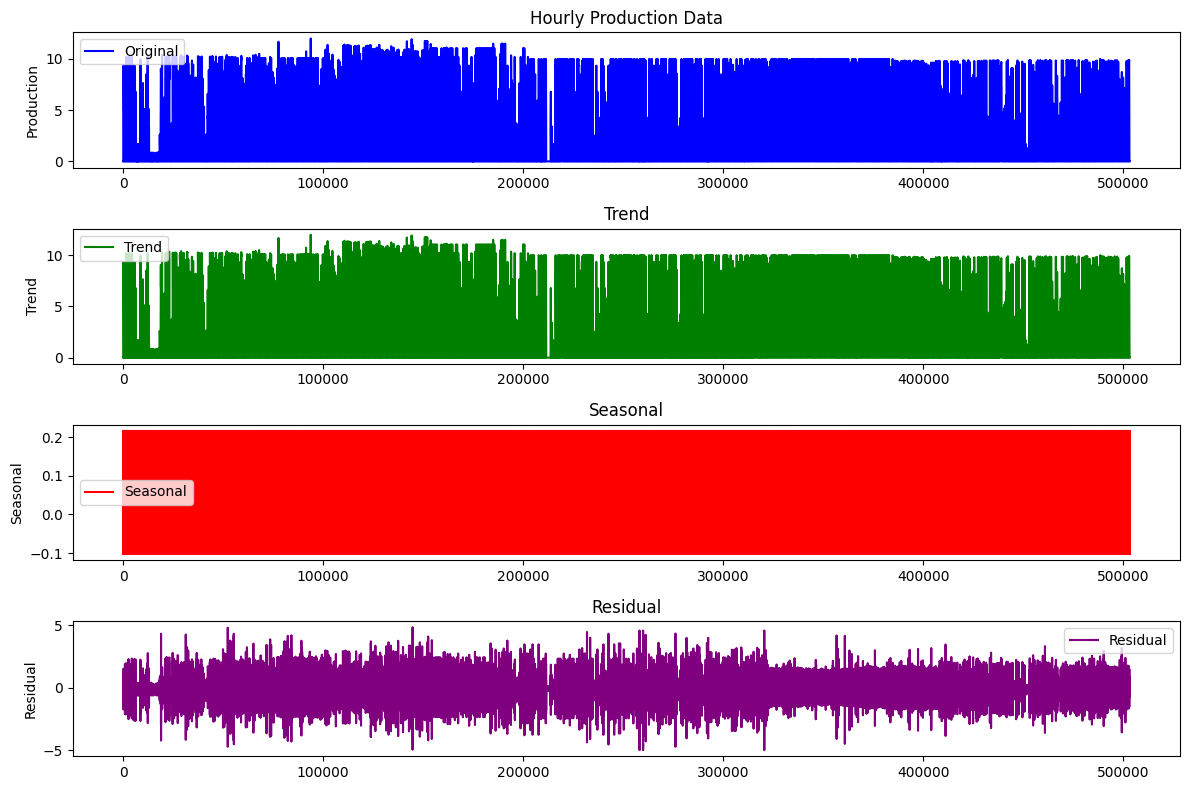

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'data' is a DataFrame containing the production data
# Convert 'data' to a time series format
ts_production = pd.Series(data['production'])

# Perform decomposition
decomposition = seasonal_decompose(ts_production, model='additive', period=24)  # Assuming hourly data

# Plot the decomposition
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(411)
plt.plot(ts_production, label='Original', color='blue')
plt.title('Hourly Production Data')
plt.ylabel('Production')
plt.legend()

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend')
plt.ylabel('Trend')
plt.legend()

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='red')
plt.title('Seasonal')
plt.ylabel('Seasonal')
plt.legend()

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='purple')
plt.title('Residual')
plt.ylabel('Residual')
plt.legend()

plt.tight_layout()
plt.show()



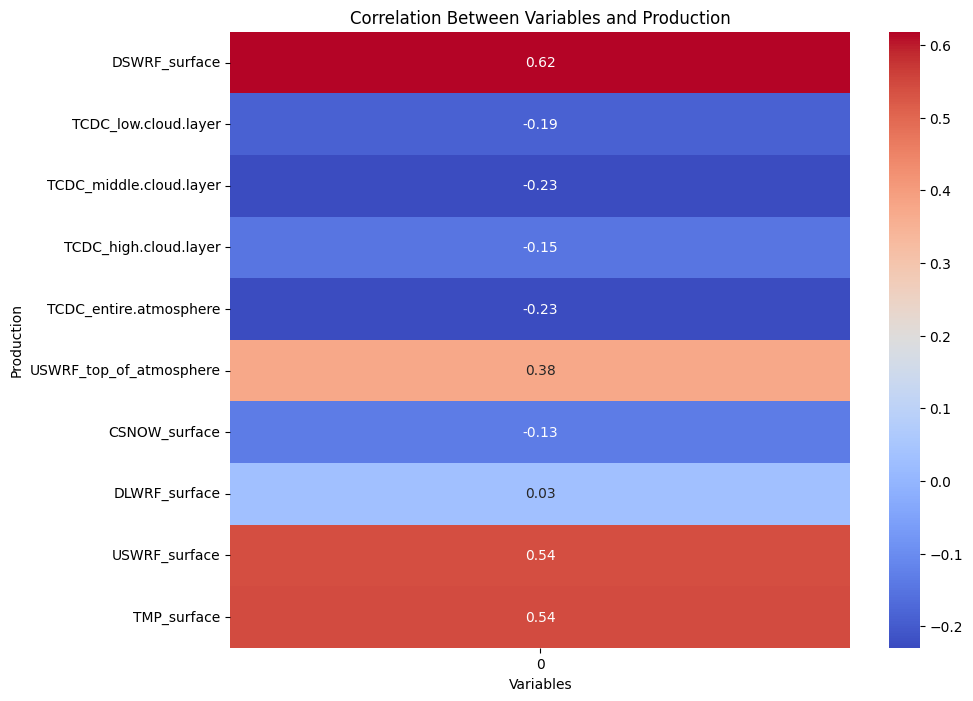

In [ ]:
# Select the columns containing variables
variable_columns = data_grouped[['DSWRF_surface', 'TCDC_low.cloud.layer', 'TCDC_middle.cloud.layer',
                                 'TCDC_high.cloud.layer', 'TCDC_entire.atmosphere', 'USWRF_top_of_atmosphere',
                                 'CSNOW_surface', 'DLWRF_surface', 'USWRF_surface', 'TMP_surface']]

# Calculate the correlation matrix
correlation_matrix = variable_columns.corrwith(data_grouped['production'])

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables and Production')
plt.xlabel('Variables')
plt.ylabel('Production')
plt.show()


In [ ]:
import statsmodels.api as sm

data_grouped['lagged_production'] = data_grouped['production'].shift(1)

data_grouped.dropna(inplace=True)

X = data_grouped[['lagged_production']]
y = data_grouped['production']

X = sm.add_constant(X)

model = sm.OLS(y, X)

results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             production   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                 8.909e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        14:59:33   Log-Likelihood:                -37755.
No. Observations:               20075   AIC:                         7.551e+04
Df Residuals:                   20073   BIC:                         7.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2484      0.01

In [ ]:
import statsmodels.api as sm

data_grouped['lagged_production'] = data_grouped['production'].shift(24)

data_grouped.dropna(inplace=True)

X = data_grouped[['lagged_production']]
y = data_grouped['production']

X = sm.add_constant(X)

model = sm.OLS(y, X)

results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             production   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                 6.440e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        14:59:44   Log-Likelihood:                -40275.
No. Observations:               20051   AIC:                         8.055e+04
Df Residuals:                   20049   BIC:                         8.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3268      0.01

In [ ]:
X = data_grouped[['DSWRF_surface', 'USWRF_surface', 'TMP_surface']]
X = sm.add_constant(X)

y = data_grouped['production']

model = sm.OLS(y, X)

results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             production   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     4684.
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        15:00:06   Log-Likelihood:                -49367.
No. Observations:               20051   AIC:                         9.874e+04
Df Residuals:                   20047   BIC:                         9.877e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -23.2999      0.752    -30.995

In [ ]:
import statsmodels.api as sm

X = data_grouped[['DSWRF_surface', 'USWRF_surface', 'TMP_surface', 'USWRF_top_of_atmosphere']]
X = sm.add_constant(X)

y = data_grouped['production']

model = sm.OLS(y, X)

results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             production   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     3615.
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        15:00:12   Log-Likelihood:                -49247.
No. Observations:               20051   AIC:                         9.850e+04
Df Residuals:                   20046   BIC:                         9.854e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
# Read data
weather = pd.read_csv("weather_info.csv")
production = pd.read_csv("production.csv")
weather['datetime'] = pd.to_datetime(weather['date']) + pd.to_timedelta(weather['hour'], unit='h')
production['datetime'] = pd.to_datetime(production['date']) + pd.to_timedelta(production['hour'], unit='h')
production = production.drop(columns=["date", "hour"])
weather = weather.drop(columns=["date", "hour"])

# Get the closest
weather["distance"] = ((38.29 - weather["lat"])**2 + (34.97 - weather["lon"])**2)
min_indices = weather.groupby("datetime")["distance"].idxmin()
weather = weather.loc[min_indices]
weather.reset_index(drop=True, inplace=True)

# Seasonality
weather["hourly_seasonality"] = np.cos(np.pi*(weather['datetime'].dt.hour - 11)/12)
weather['hourly_seasonality'] = np.where(weather['hourly_seasonality'] < 0, 0, weather['hourly_seasonality'])
weather["yearly_seasonality"] = abs(np.cos(np.pi*(weather['datetime'].dt.dayofyear - 172)/365))

"""plt.plot(weather['yearly_seasonality'][:17500])
plt.show()
plt.plot(weather['hourly_seasonality'][:200])
plt.show()"""

merged = pd.merge(weather, production, on='datetime', how='inner')
merged = merged.rename_axis(None, axis=1).sort_values(by="datetime")
production = merged["production"]
weather = merged.drop(columns=["production", "datetime","distance", "lat", "lon"])

print(weather)



In [ ]:
# read data
weather = pd.read_csv("weather_info.csv")
production = pd.read_csv("production.csv")
weather = weather.drop(columns=["TCDC_low.cloud.layer", "TCDC_middle.cloud.layer", "TCDC_high.cloud.layer", "TCDC_entire.atmosphere", "USWRF_top_of_atmosphere", "CSNOW_surface", "DLWRF_surface"])
weather['datetime'] = pd.to_datetime(weather['date']) + pd.to_timedelta(weather['hour'], unit='h')
production['datetime'] = pd.to_datetime(production['date']) + pd.to_timedelta(production['hour'], unit='h')
production = production.drop(columns=["date", "hour"])
weather = weather.drop(columns=["date", "hour"])

# make wide
weather = weather.pivot_table(index="datetime", columns=["lat", "lon"])
new_columns = [f'{col[0]}_{col[1]}_{col[2]}' for col in weather.columns]
weather.columns = new_columns
weather.reset_index(inplace=True)

# seasonality
weather["hourly_seasonality"] = np.cos(np.pi*(weather['datetime'].dt.hour - 11)/12)
weather['hourly_seasonality'] = np.where(weather['hourly_seasonality'] < 0, 0, weather['hourly_seasonality'])
weather["yearly_seasonality"] = abs(np.cos(np.pi*(weather['datetime'].dt.dayofyear - 172)/365))

merged = pd.merge(weather, production, on='datetime', how='inner')
merged = merged.rename_axis(None, axis=1).sort_values(by="datetime")
merged_pred = pd.merge(weather, production, on='datetime', how='left')
merged_pred = merged_pred[merged_pred['production'].isna()]
merged_pred = merged_pred[weather.columns]
merged_pred = merged_pred.rename_axis(None, axis=1).sort_values(by="datetime")
production = merged["production"]
weather = merged.drop(columns=["production", "datetime"])
weather_pred = merged_pred.drop(columns=["datetime"])
print(weather)


In [ ]:
y = production
X = weather


y_train = y.iloc[:].copy()
y_test = y.iloc[:].copy()
X_train = X.iloc[:].copy()
X_test = X.iloc[:].copy()
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
X_test = X_test.fillna(X_train.mean())
y_test = y_test.fillna(y_train.mean())

# Linear model
model = sm.OLS(y_train,X_train)
results = model.fit()
print(results.summary())

# Forecast of the model
forecast = results.predict(X_test)
forecast = np.maximum(forecast, 0)
model_residuals = y_test.values - forecast.values

"""plt.plot(model_residuals, label='Residual Analysis')
plt.legend()
plt.show()"""

# Calculate MAPE
wmape = sum(abs(forecast-y_test))/sum(y_test)
print("Weighted MAPE:", wmape)

# Plot actual vs forecast for both cases
plt.plot(y.index[-300:-1], y[-300:-1], label='Actual')
plt.plot(y.index[-300:-1], forecast[-300:-1], label='Forecast')
plt.legend()
plt.show()



In [ ]:
y = production
X = weather

y_train = y.iloc[:].copy()
y_test = y.iloc[:].copy()
X_train = X.iloc[:].copy()
X_test = X.iloc[:].copy()
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
X_test = X_test.fillna(X_train.mean())
y_test = y_test.fillna(y_train.mean())

# ARIMA model
for p in [0,1,2]:
    for d in [0,1,2]:
        for q in [0,1,2]:
            y_train.index = pd.Index(range(len(y_train)))
            X_train.index = pd.Index(range(len(X_train)))
            model = ARIMA(y_train, order=(p, d, q))
            results = model.fit()
            print(p, d, q, " : ", int(results.aic), int(results.bic))


In [ ]:
y = production
X = weather


y_train = y.iloc[:].copy()
y_test = y.iloc[:].copy()
X_train = X.iloc[:].copy()
X_test = X.iloc[:].copy()
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
X_test = X_test.fillna(X_train.mean())
y_test = y_test.fillna(y_train.mean())

# ARIMAX model
y_train.index = pd.Index(range(len(y_train)))
X_train.index = pd.Index(range(len(X_train)))
model = ARIMA(y_train, order=(2,1,2),exog=X_train)
results = model.fit()
print(results.summary())

# Forecast of the model
forecast = results.predict(start = 0, end=len(y_train) - 1)
forecast = np.maximum(forecast, 0)
model_residuals = y_test.values - forecast.values

"""plt.plot(model_residuals, label='Residual Analysis')
plt.legend()
plt.show()"""

# Calculate MAPE
wmape = sum(abs(forecast-y_test))/sum(y_test)
print("Weighted MAPE:", wmape)

# Plot actual vs forecast for both cases
plt.plot(y.index[-300:-1], y[-300:-1], label='Actual')
plt.plot(y.index[-300:-1], forecast[-300:-1], label='Forecast')
plt.legend()
plt.show()

